# SC1015 Mini-Project

Group: 2, FCEE

Lee Heng Sheng Brandon, U2322900C \
Alan Lee Leman, U2321753B \
Wee Zi Hao, U2323380H

### Final Attribute Information

> 1. `age`: age in years (Numerical)
2. `sex`: 0 = female; 1 = male (Categorical)
3. `cp` changed to `chest_pain`: Chest pain type (4 values) (Categorical)
4. `trestbps` changed to `blood_pressure`: Resting blood pressure (in mm Hg on admission to the hospital) (Numerical)
5. `chol` changed to `cholesterol`: Serum cholesterol in mg/dl (serum cholestoral in mg/dl) (Numerical)
6. `fbs` changed to `fasting_blood_sugar`: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) (Categorical)
7. `restecg` changed to `resting_ecg_result`: Resting electrocardiographic results (values 0,1,2) (Categorical)
8. `thalach` changed to `max_heart_rate`: Maximum heart rate achieved (in bpm) (Numerical)
9. `exang` changed to `exercise_induced_angina`: Exercise induced angina (0 = no; 1 = yes) (Categorical)
10. `oldpeak` changed to `st_depression`: ST depression induced by exercise relative to rest (Numerical)
11. `new_st_depression`: The presence of ST depression induced by exercise relative to rest (0 = no; 1 = yes) (Categorical)
12. `slope`: The slope of the peak exercise ST segment (0, 1, 2) (Categorical)
13. `ca` changed to `num_affected_vessels`: Number of major vessels (0-3) colored by fluoroscopy (Categorical)
14. `thal` changed to `defect_type`: 1 = normal; 2 = fixed defect; 3 = reversable defect (Categorical)
15. `target` changed to `heart_disease`: 0 = no heart disease; 1 = heart disease (Categorical)

### Essential Libraries

Let us begin by importing the essential Python Libraries for Data Extraction and Cleaning.

> NumPy : Library for Numeric Computations in Python \
Pandas : Library for Data Acquisition and Preparation \
Matplotlib : Low-level library for Data Visualization \
Seaborn : Higher-level library for Data Visualization 

In [32]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,ConfusionMatrixDisplay,confusion_matrix,accuracy_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

### Import the Dataset

We will be importing our clean_data.csv dataset that we previously saved.\
Dataset is a cleaned version of [Heart Disease](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset). By David Lapp. 


In [33]:
# Importing our dataset
clean_data = pd.read_csv("datasets\clean_data.csv")

print("Data dimensions:", clean_data.shape)

clean_data

Data dimensions: (1000, 15)


age  sex  chest_pain  blood_pressure  cholesterol  fasting_blood_sugar  \
0     52    1           0             125          212                    0   
1     53    1           0             140          203                    1   
2     70    1           0             145          174                    0   
3     61    1           0             148          203                    0   
4     62    0           0             138          294                    1   
..   ...  ...         ...             ...          ...                  ...   
995   59    1           1             140          221                    0   
996   60    1           0             125          258                    0   
997   47    1           0             110          275                    0   
998   50    0           0             110          254                    0   
999   54    1           0             120          188                    0   

     resting_ecg_result  max_heart_rate  exercise_induced_angina  \
0                     1             168                        0   
1                     0             155                        1   
2                     1             125                        1   
3                     1             161                        0   
4                     1             106                        0   
..                  ...             ...                      ...   
995                   1             164                        1   
996                   0             141                        1   
997                   0             118                        1   
998                   0             159                        0   
999                   1             113                        0   

     st_depression  new_st_depression  slope  num_affected_vessels  \
0              1.0                  1      2                     2   
1              3.1                  1      0                     0   
2              2.6                  1      0                     0   
3              0.0                  0      2                     1   
4              1.9                  1      1                     3   
..             ...                ...    ...                   ...   
995            0.0                  0      2                     0   
996            2.8                  1      1                     1   
997            1.0                  1      1                     1   
998            0.0                  0      2                     0   
999            1.4                  1      1                     1   

     defect_type  heart_disease  
0              3              0  
1              3              0  
2              3              0  
3              3              0  
4              2              0  
..           ...            ...  
995            2              1  
996            3              0  
997            2              0  
998            2              1  
999            3              0  

[1000 rows x 15 columns]

In [34]:
# Make a list of numerical and categorical variables
cat_var = ["sex", "chest_pain", "fasting_blood_sugar", "resting_ecg_result", "exercise_induced_angina", "new_st_depression", 
           "slope", "num_affected_vessels", "defect_type", "heart_disease"]
num_var = [var for var in clean_data.columns if var not in cat_var]

### RANDOM FOREST TREE

We use a random forest to check if predictor affects our target (more reliable compared to decision trees which are inaccurate)
Tree-based models are more forgiving on outliers than decision trees, as such we can use pre processed data to work with as they use multiple trees and predicts the target value using them.

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clean_data[num_var], clean_data["heart_disease"],
                                                    test_size = 0.2, random_state = 42)

We use Out of Bag(oob) score as our test data(data not used in the training data, bootstrap data is rows of the data that we used to train) as it is not seen by the bagging algorithm(our random forest) and thus will give a better classification accuracy of our regressor. n_estimators indicate the number of trees we use, for now we use a random number such as 10. Max depth of the tree will also be set as 5. While min_samples_split (minimum number of samples in a node to split into child nodes) will be set as 5

In [36]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    # Create random forest
    randomforest = RandomForestClassifier(max_depth = 5, random_state = 0, oob_score = True, 
                                          n_estimators = 10, min_samples_split = 5)
    randomforest.fit(X_train, y_train)

# Access the OOB Score
oob_score = randomforest.oob_score_
print(f"Out-of-Bag Score: {oob_score}")

predictions = randomforest.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


Out-of-Bag Score: 0.805
Mean Squared Error: 0.175


Plot the first 2 trees, (as plotting more would take too long to show)

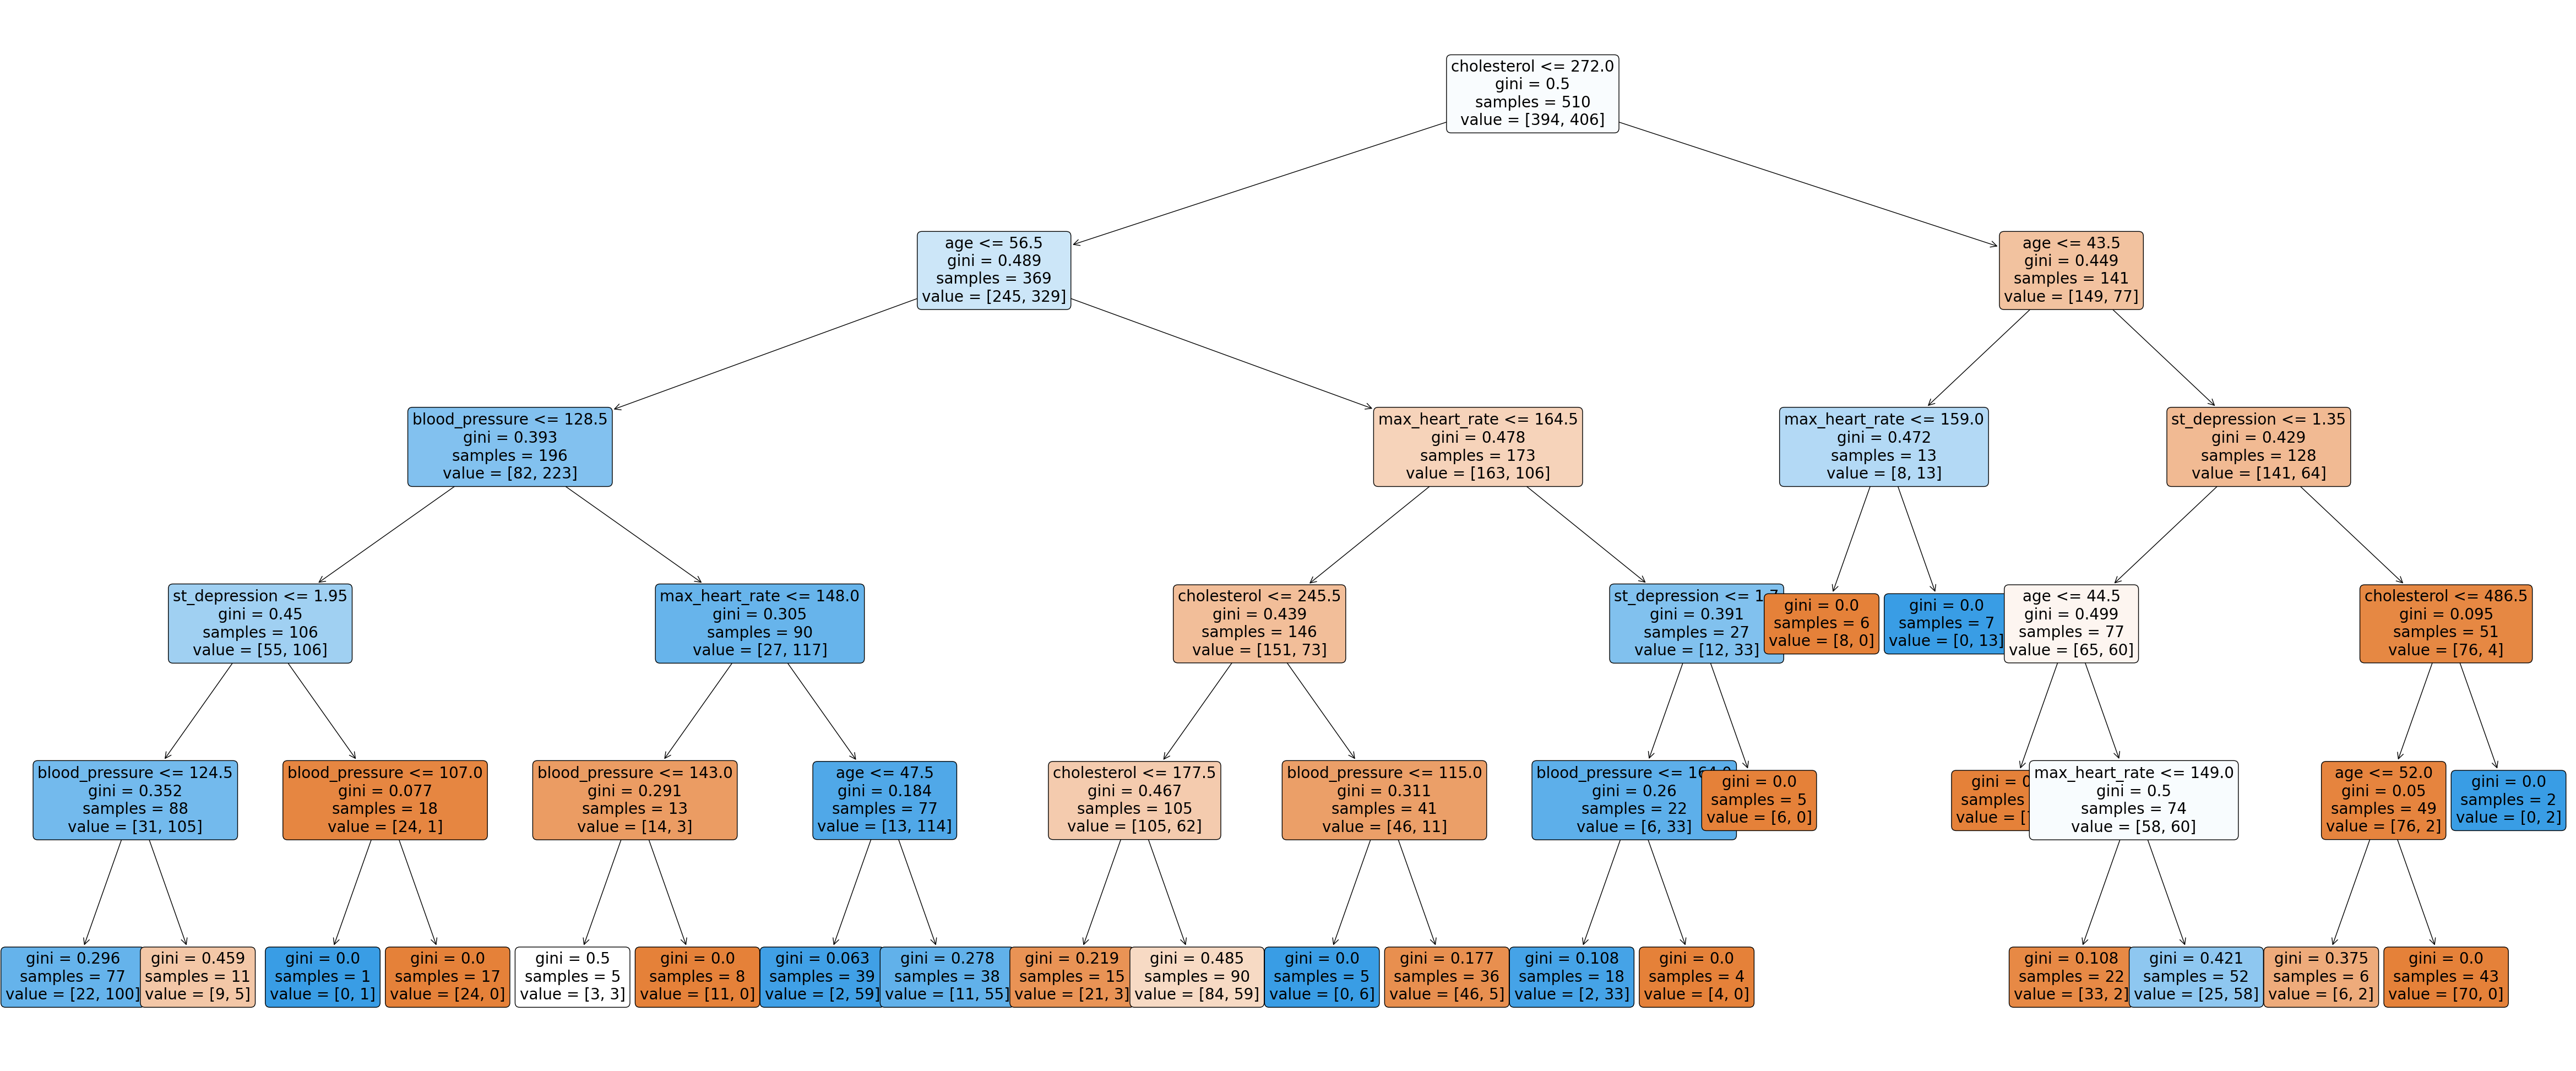

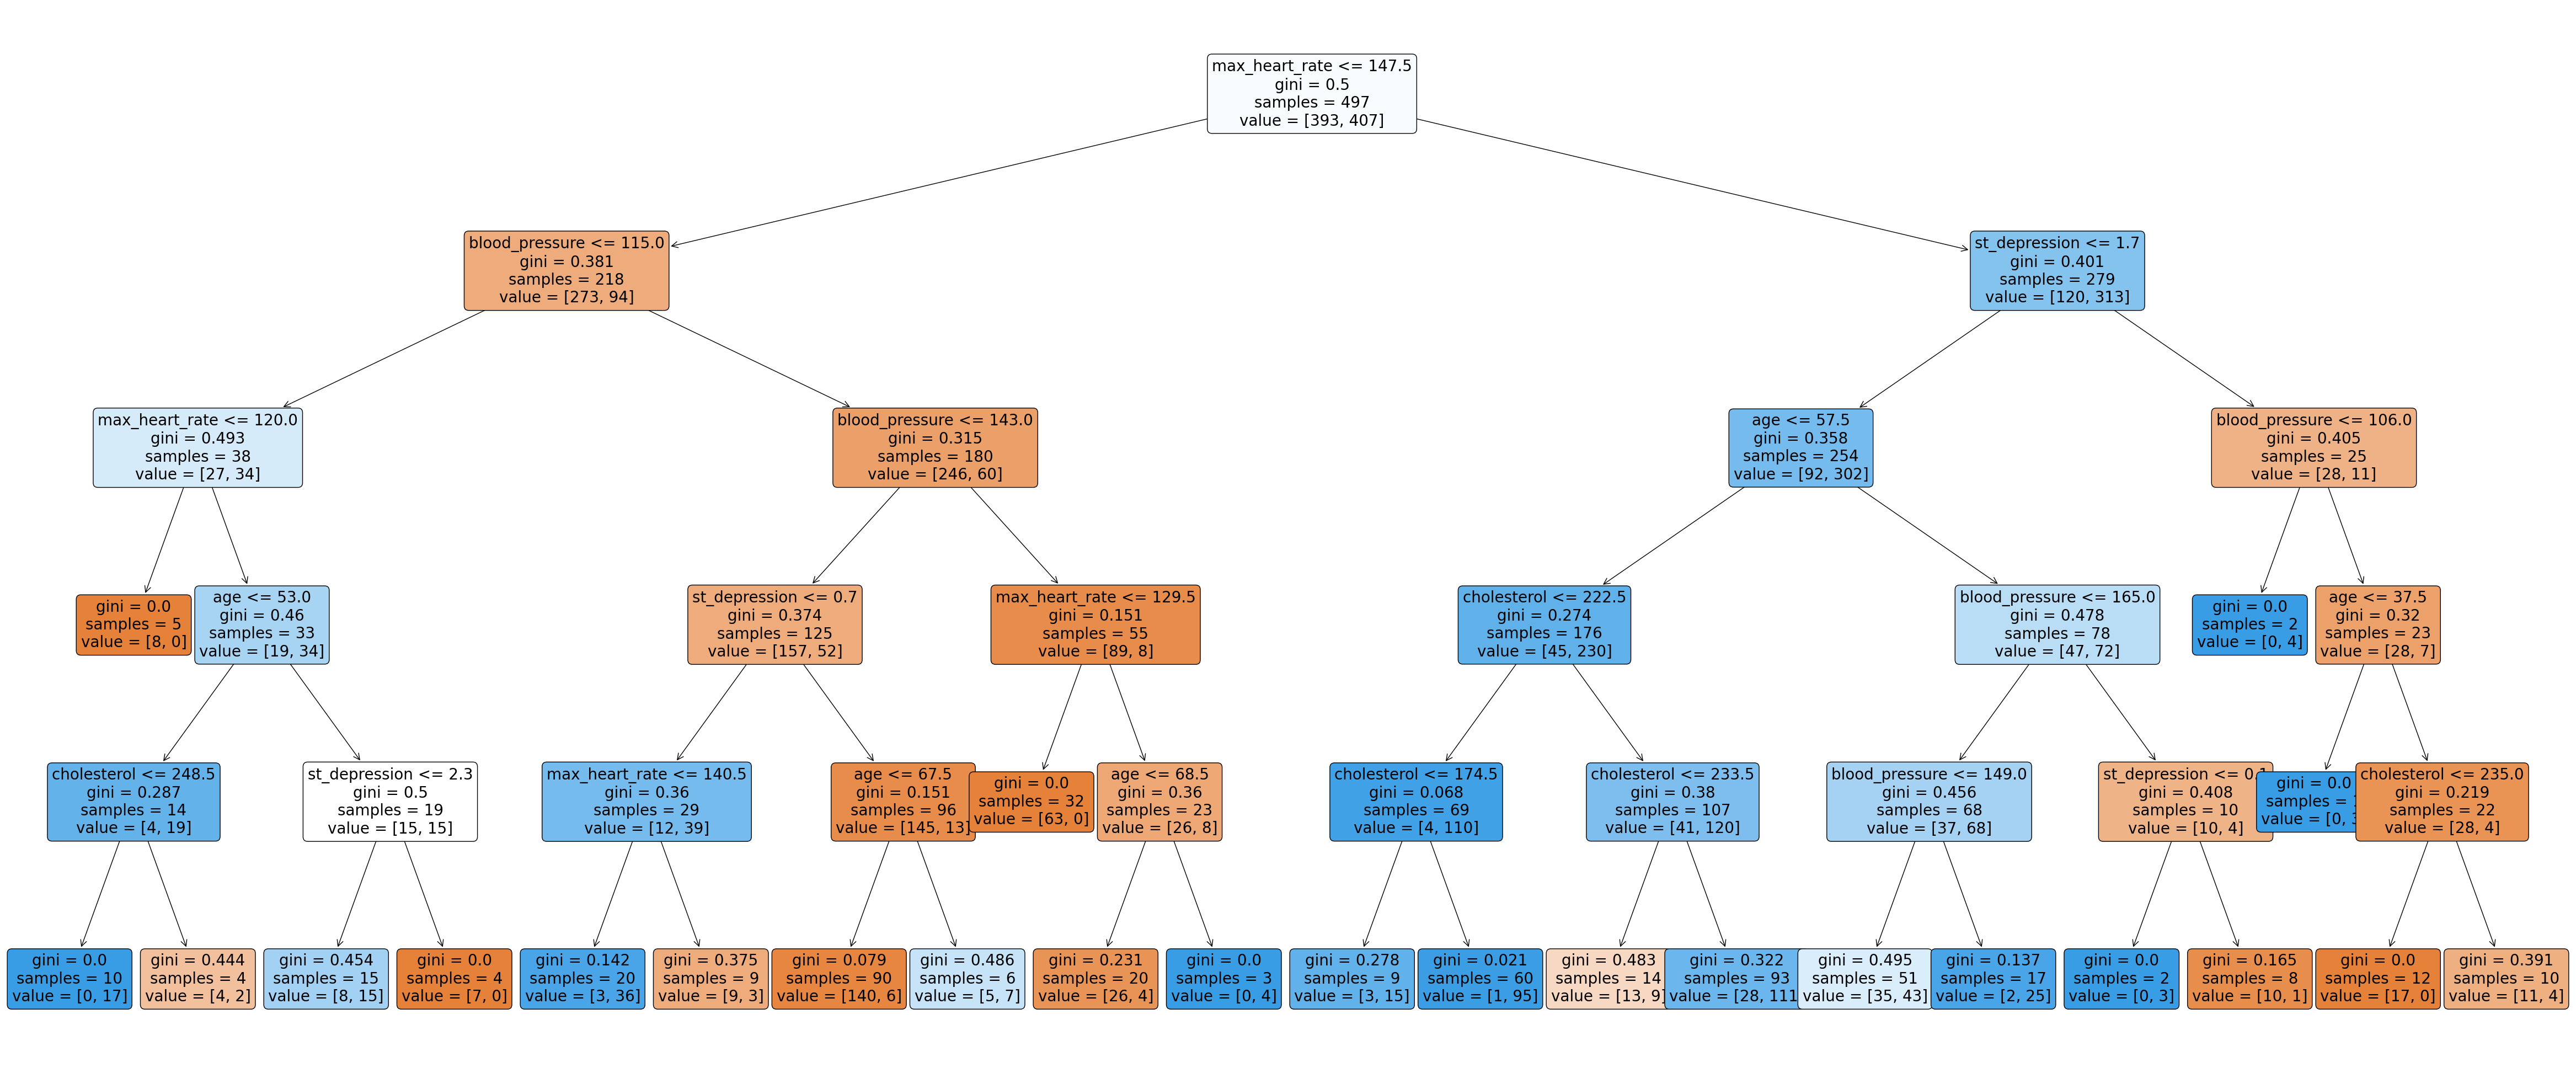

In [37]:
for tree in range(2):
    plt.figure(figsize=(60, 25))
    plot_tree(randomforest.estimators_[tree], feature_names=clean_data[num_var].columns.tolist(), filled=True, rounded=True, fontsize=20)
    plt.show()

We can show how accurate our forest is using a confusion matrix

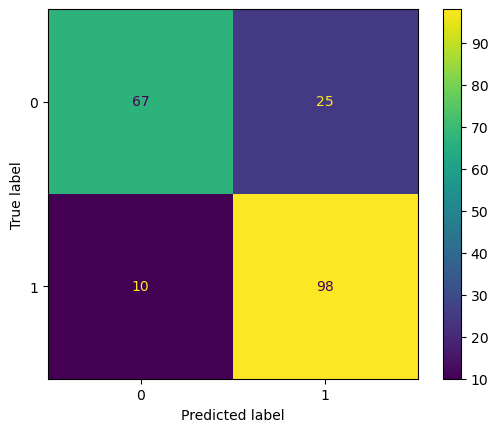

In [38]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,predictions)).plot()

## Hyperparameter tuning

Our algorithm is pretty decent, with an out of bag score of 0.805 we can accurately predict the chances of a patient having heart disease most of the time. However, it can be even better, we initially just picked random values for the parameters such as max_depth = 5 and n_estimators(number of trees) = 10 and min_samples_split = 5.

 We can tune our hyperparameters to find optimal values to tweak our random forest's performance and produce an even better score.

In [39]:
parameter_values = {}
parameters = ["max_depth","n_estimators","min_samples_split"]

for parameter in parameters:
    parameter_values[parameter] = []

for i in range(2,10,2):
    parameter_values["min_samples_split"].append(i)

for i in range(5,30,5):
    parameter_values["n_estimators"].append(i)

for i in range(5,30,5):
    parameter_values["max_depth"].append(i)

#### GridSearchcv

A scikit-learn function called GridSearchCV trains and evaluates a machine learning model using various combinations of hyperparameters in order to do hyperparameter tuning. A predetermined performance metric is then used to determine which combination of hyperparameters is optimal. In this it will train and test our randomforest using the parameter and values provided under parameter_values

#### Crossvalidation

GridSearchcv also does K-fold cross-validation(as mentioned in the name cv). K-fold cross-validation is a technique for evaluating predictive models. The dataset is divided into k different subsets. After that, the model is trained and assessed k times, with a new fold serving as the validation set each time. The advantage is that the entire data set can be included as part of the testing data when K-fold cross validation is applied. In this manner, we can use every piece of data from our limited dataset for testing as well as training, letting us assess our model's performance more accurately while preventing overfitting of our data.

The number of subsets is specified by the cv parameter in gridsearchcv, in this case we will set it as 5 (the limiting factor here is computing power if it is too large, even size of 5 will already take a while to run)

In [40]:
# Please give code 10 seconds to run
grid_search = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid = parameter_values, cv = 5) 
grid_search.fit(X_train, y_train) 

# Print out the best estimated value
print(grid_search.best_estimator_) 

RandomForestClassifier(max_depth=15, n_estimators=25, random_state=42)


In [41]:
# Create random forest
randomforest = RandomForestClassifier(max_depth = 15, random_state = 42, oob_score = True, n_estimators = 25)
randomforest.fit(X_train, y_train)

# Access the OOB Score
oob_score = randomforest.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = randomforest.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Out-of-Bag Score: 0.99
Mean Squared Error: 0.0


Our out of bag score is now 0.99, meaning we are now almost able to always predict whether someone has heart disease with the tuned model, indicating it is a lot better (in fact perfectly for our test set)

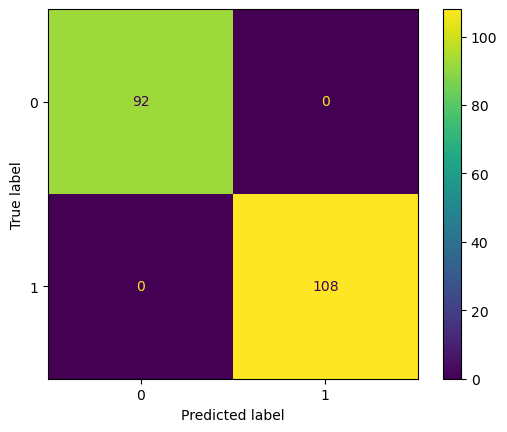

In [42]:
# Tree is not printed as it is too large
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,predictions)).plot()